<a href="https://colab.research.google.com/github/Sristi222/FakeCurrencyDetector/blob/main/Coursewok_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import Sequential
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [6]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/Nepali Currency Dataset'

In [2]:
# Define image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_EPOCHS = 25  # Increased number of epochs
LEARNING_RATE = 0.0001  # Lower learning rate for fine-tuning

In [4]:
# Data preprocessing with augmentation
datagen_train = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen_validation = ImageDataGenerator(rescale=1.0 / 255.0)

In [7]:
# Load train, validation, and test datasets
train_data = datagen_train.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Nepali Currency Dataset/Train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

Found 190 images belonging to 2 classes.


In [9]:
validation_data = datagen_validation.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Nepali Currency Dataset/Validation",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 75 images belonging to 2 classes.


In [10]:
test_data = datagen_validation.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Nepali Currency Dataset/Test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)


Found 130 images belonging to 2 classes.


In [12]:
# Load pre-trained MobileNetV2 as the base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [26]:
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)  # Define the feature extractor

In [27]:
# Extract features for the training set
train_features = feature_extractor.predict(train_data, verbose=1)
train_features = train_features.reshape(train_features.shape[0], -1)  # Flatten features
train_labels = train_data.classes

6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step


In [30]:
# Extract features for the validation set
validation_features = feature_extractor.predict(validation_data, verbose=1)
validation_features = validation_features.reshape(validation_features.shape[0], -1)  # Flatten features
validation_labels = validation_data.classes

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 741ms/step


In [28]:
# Extract features for the test set
test_features = feature_extractor.predict(test_data, verbose=1)
test_features = test_features.reshape(test_features.shape[0], -1)
test_labels = test_data.classes

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 878ms/step


In [15]:
# Build CNN Model
cnn_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [16]:
# Compile the Model
cnn_model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [17]:
# Callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1),
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
]

In [18]:
# Train the Model
history = cnn_model.fit(
    train_data,
    validation_data=validation_data,
    epochs=NUM_EPOCHS,
    callbacks=callbacks
)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 67s 5s/step - accuracy: 0.4678 - loss: 0.9507 - val_accuracy: 0.4667 - val_loss: 0.7507 - learning_rate: 1.0000e-04
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.4726 - loss: 0.8971 - val_accuracy: 0.5600 - val_loss: 0.6312 - learning_rate: 1.0000e-04
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6613 - loss: 0.6958 - val_accuracy: 0.7067 - val_loss: 0.5418 - learning_rate: 1.0000e-04
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6931 - loss: 0.5814 - val_accuracy: 0.7733 - val_loss: 0.4721 - learning_rate: 1.0000e-04
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7541 - loss: 0.5486 - val_accuracy: 0.8267 - val_loss: 0.4219 - learning_rate: 1.0000e-04
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7749 - loss: 0.4891 - val_accuracy: 0.8400 - val_loss: 0.3798 - learning_rate: 1.0000e-04
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8194 - loss: 0.4673 - val_accuracy: 0

In [20]:
# Unfreeze Some Layers for Fine-Tuning
base_model.trainable = True
for layer in base_model.layers[:-50]:  # Freeze all but the last 50 layers
    layer.trainable = False


In [21]:
# Recompile the Model
cnn_model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE / 10),  # Use a lower learning rate for fine-tuning
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [22]:
# Recompile the Model
cnn_model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE / 10),  # Use a lower learning rate for fine-tuning
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [23]:
# Fine-Tune the Model
fine_tune_epochs = 10
history_fine_tune = cnn_model.fit(
    train_data,
    validation_data=validation_data,
    epochs=fine_tune_epochs,
    callbacks=callbacks
)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9189 - loss: 0.2674 - val_accuracy: 0.9733 - val_loss: 0.1276 - learning_rate: 1.0000e-05
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.8878 - loss: 0.3276 - val_accuracy: 0.9733 - val_loss: 0.1169 - learning_rate: 1.0000e-05
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9436 - loss: 0.2130 - val_accuracy: 0.9733 - val_loss: 0.1054 - learning_rate: 1.0000e-05
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.9312 - loss: 0.2413 - val_accuracy: 0.9733 - val_loss: 0.0954 - learning_rate: 1.0000e-05
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.9151 - loss: 0.2269 - val_accuracy: 0.9867 - val_loss: 0.0862 - learning_rate: 1.0000e-05
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.8974 - loss: 0.2342 - val_accuracy: 1.0000 - val_loss: 0.0786 - learning_rate: 1.0000e-05
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9243 - loss: 0.2192 - val_

In [24]:
# Evaluate on the Test Set
test_loss, test_accuracy = cnn_model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.9923 - loss: 0.0563
Test Loss: 0.0725
Test Accuracy: 98.46%


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, 

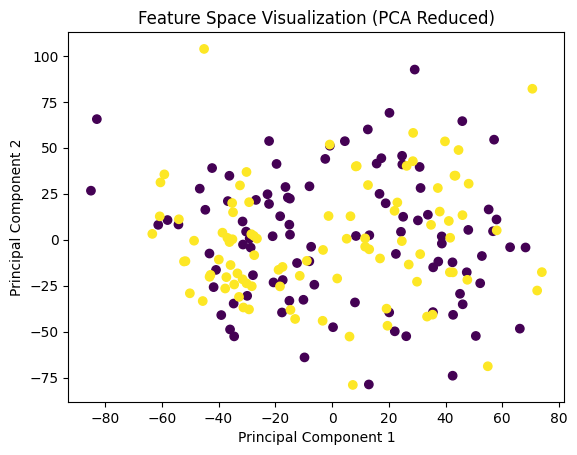

In [55]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Feature Scaling (Critical for SVM)
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
validation_features_scaled = scaler.transform(validation_features)
test_features_scaled = scaler.transform(test_features)

# Handle Imbalanced Dataset (Optional)
# Apply SMOTE to balance the classes in the training set
smote = SMOTE()
train_features_resampled, train_labels_resampled = smote.fit_resample(train_features_scaled, train_labels)

# Dimensionality Reduction (Optional, Use PCA if needed)
# Reduce features to fewer dimensions to improve training speed and generalization
pca = PCA(n_components=100)  # Reduce to 100 principal components
train_features_pca = pca.fit_transform(train_features_resampled)
validation_features_pca = pca.transform(validation_features_scaled)
test_features_pca = pca.transform(test_features_scaled)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernels
    'gamma': [1, 0.1, 0.01, 0.001]  # For 'rbf' and 'poly' kernels
}

grid_search = GridSearchCV(
    SVC(probability=True),  # SVM with probability=True for probability predictions
    param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',  # Optimize for accuracy
    verbose=2
)

# Fit the GridSearchCV on the training data
grid_search.fit(train_features_pca, train_labels_resampled)

# Best Hyperparameters
print(f"Best Parameters: {grid_search.best_params_}")

# Train Final SVM Model with Best Hyperparameters
svm_model = grid_search.best_estimator_

# Validate the SVM Model
validation_predictions = svm_model.predict(validation_features_pca)
validation_accuracy = accuracy_score(validation_labels, validation_predictions)
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")

# Test the SVM Model
test_predictions = svm_model.predict(test_features_pca)
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Classification Report on Test Data
print("\nClassification Report:")
print(classification_report(test_labels, test_predictions, target_names=['Fake', 'Real']))

# Optional: Visualize the Feature Space using PCA (2D for Visualization)
pca_visualization = PCA(n_components=2)
reduced_features = pca_visualization.fit_transform(train_features_scaled)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=train_labels, cmap='viridis')
plt.title('Feature Space Visualization (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
